In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cars.csv')
df
#training trainding data -80% and test data -20% sklearn train_test_split
#apply linear regression on training data and build model
#lin_req1 = linear_model.LinearRegression()
#from sklearn.model_selection import cross_val_predict

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31/12/12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,31/12/12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,31/12/12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,31/12/12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [3]:
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

**1 . Identify the season with overall trend in highest car sharing**

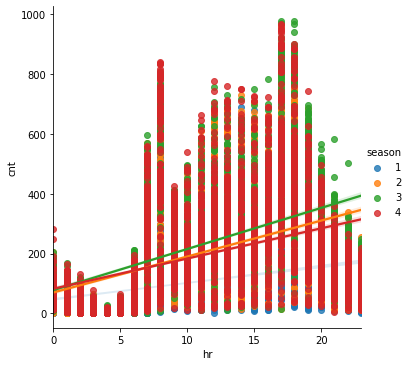

In [4]:
g = sns.lmplot(x="hr", y="cnt",hue="season", data=df)

**2.  Identify how car sharing trend varies on hourly basis and identify the peak day of the week during afternoon.**

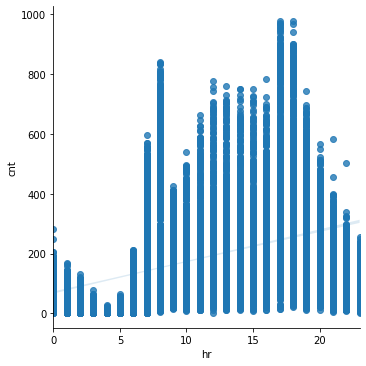

In [5]:
t = sns.lmplot(x="hr", y="cnt", data=df)

identifying peak day of the week during afternoon

In [6]:
afternoon=df[(df['hr']>=12) & (df['hr']<17)]
afternoon

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
12,13,01/01/11,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84
13,14,01/01/11,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,94
14,15,01/01/11,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,106
15,16,01/01/11,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,110
16,17,01/01/11,1,0,1,16,0,6,0,2,0.42,0.4242,0.82,0.2985,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17367,17368,31/12/12,1,1,12,12,0,1,1,2,0.24,0.2273,0.56,0.1940,224
17368,17369,31/12/12,1,1,12,13,0,1,1,2,0.26,0.2576,0.44,0.1642,203
17369,17370,31/12/12,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,247
17370,17371,31/12/12,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,315


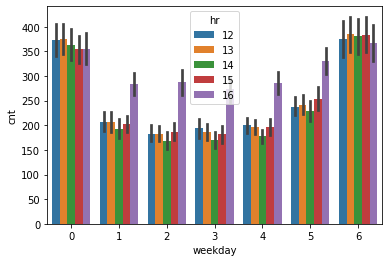

In [7]:
ax = sns.barplot(x="weekday", y="cnt", hue="hr",data=afternoon)

from the above plot we can say that on the 6th day the car share trend is high

**3. Identify the month with the Highest Car Sharings**


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

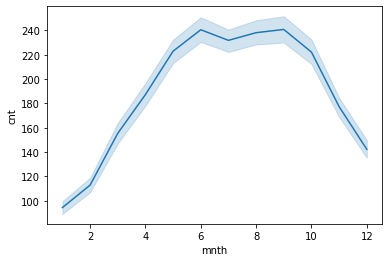

In [8]:
sns.lineplot(data=df, x="mnth", y="cnt")

from the above chart we can say that between august and october max car sharings

**4. Perform correlation analysis and list all highly correlated attributes**

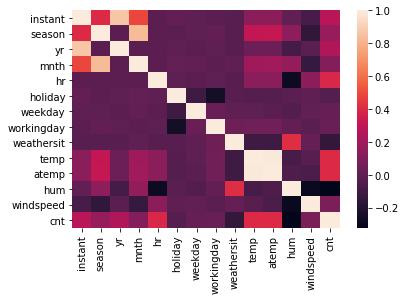

In [9]:
h = sns.heatmap(df.corr())

In [10]:
df.corr().unstack().sort_values()

hum        cnt         -0.322911
cnt        hum         -0.322911
hum        windspeed   -0.290105
windspeed  hum         -0.290105
hr         hum         -0.276498
                          ...   
mnth       mnth         1.000000
yr         yr           1.000000
season     season       1.000000
windspeed  windspeed    1.000000
cnt        cnt          1.000000
Length: 196, dtype: float64

In [1]:
corr = df.corr()

kot = corr[corr>.5]
sns.heatmap(kot, cmap="Greens")

NameError: name 'df' is not defined

*from the above heatmap we can say that yr, temp and atemp are highly correlated with each other*


**5. Perform one hot encoding and normalization**

In [12]:
df2=df.copy()
df2.drop(['dteday','instant','temp','yr','atemp'], inplace=True, axis=1)
df2

,season,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.81,0.0000,16
1,1,1,1,0,6,0,1,0.80,0.0000,40
2,1,1,2,0,6,0,1,0.80,0.0000,32
3,1,1,3,0,6,0,1,0.75,0.0000,13
4,1,1,4,0,6,0,1,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.60,0.1642,119
17375,1,12,20,0,1,1,2,0.60,0.1642,89
17376,1,12,21,0,1,1,1,0.60,0.1642,90
17377,1,12,22,0,1,1,1,0.56,0.1343,61


In [13]:
y = pd.get_dummies(df2['season'], prefix='season')
print(y.head())
# Season, is_holiday, weather_condition, is_workingday

   season_1  season_2  season_3  season_4
0         1         0         0         0
1         1         0         0         0
2         1         0         0         0
3         1         0         0         0
4         1         0         0         0


In [14]:
y1 = pd.get_dummies(df2['holiday'], prefix='holiday')
print(y1.head())

   holiday_0  holiday_1
0          1          0
1          1          0
2          1          0
3          1          0
4          1          0


In [15]:
y2 = pd.get_dummies(df2['weathersit'], prefix='weather_cond')
print(y2.head())

   weather_cond_1  weather_cond_2  weather_cond_3  weather_cond_4
0               1               0               0               0
1               1               0               0               0
2               1               0               0               0
3               1               0               0               0
4               1               0               0               0


In [16]:
y3 = pd.get_dummies(df2['workingday'], prefix='working_day')
y3

,working_day_0,working_day_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17374,0,1
17375,0,1
17376,0,1
17377,0,1


normalizing 

In [17]:
from sklearn import preprocessing
x = df2.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled)
df3

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.81,0.000000,0.015369
1,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.80,0.000000,0.039959
2,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.80,0.000000,0.031762
3,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.75,0.000000,0.012295
4,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.75,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.60,0.193018,0.120902
17375,0.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.60,0.193018,0.090164
17376,0.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.60,0.193018,0.091189
17377,0.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.56,0.157870,0.061475


**6. training data-80% and test data-20 %.**

In [18]:
df_model=df.copy()

#df_model=df_model.drop(['dteday','instant','temp','yr','atemp','holiday','weathersit','season','workingday'], inplace=True, axis=1)
df_model

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31/12/12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,31/12/12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,31/12/12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,31/12/12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [19]:
df_model=df_model.drop(['dteday','instant','holiday','atemp'], axis=1)
df_model

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,1,1,1,0.26,0.56,0.1343,61


In [20]:
df_model=pd.concat([df_model,y,y1,y2,y3],axis=1)
df_model=df_model.drop(['season','workingday','weathersit'], axis=1)
df_model

,yr,mnth,hr,weekday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,weather_cond_1,weather_cond_2,weather_cond_3,weather_cond_4,working_day_0,working_day_1
0,0,1,0,6,0.24,0.81,0.0000,16,1,0,0,0,1,0,1,0,0,0,1,0
1,0,1,1,6,0.22,0.80,0.0000,40,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,2,6,0.22,0.80,0.0000,32,1,0,0,0,1,0,1,0,0,0,1,0
3,0,1,3,6,0.24,0.75,0.0000,13,1,0,0,0,1,0,1,0,0,0,1,0
4,0,1,4,6,0.24,0.75,0.0000,1,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,0.26,0.60,0.1642,119,1,0,0,0,1,0,0,1,0,0,0,1
17375,1,12,20,1,0.26,0.60,0.1642,89,1,0,0,0,1,0,0,1,0,0,0,1
17376,1,12,21,1,0.26,0.60,0.1642,90,1,0,0,0,1,0,1,0,0,0,0,1
17377,1,12,22,1,0.26,0.56,0.1343,61,1,0,0,0,1,0,1,0,0,0,0,1


In [21]:
from sklearn import preprocessing

x = df_model[['temp','hum','windspeed']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_model1 = pd.DataFrame(x_scaled)
df_model1

,0,1,2
0,0.224490,0.81,0.000000
1,0.204082,0.80,0.000000
2,0.204082,0.80,0.000000
3,0.224490,0.75,0.000000
4,0.224490,0.75,0.000000
...,...,...,...
17374,0.244898,0.60,0.193018
17375,0.244898,0.60,0.193018
17376,0.244898,0.60,0.193018
17377,0.244898,0.56,0.157870


In [22]:
df_model=df_model.drop(['temp','hum','windspeed'], axis=1)
df_model=pd.concat([df_model,df_model1],axis=1)
df_model

,yr,mnth,hr,weekday,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,weather_cond_1,weather_cond_2,weather_cond_3,weather_cond_4,working_day_0,working_day_1,0,1,2
0,0,1,0,6,16,1,0,0,0,1,0,1,0,0,0,1,0,0.224490,0.81,0.000000
1,0,1,1,6,40,1,0,0,0,1,0,1,0,0,0,1,0,0.204082,0.80,0.000000
2,0,1,2,6,32,1,0,0,0,1,0,1,0,0,0,1,0,0.204082,0.80,0.000000
3,0,1,3,6,13,1,0,0,0,1,0,1,0,0,0,1,0,0.224490,0.75,0.000000
4,0,1,4,6,1,1,0,0,0,1,0,1,0,0,0,1,0,0.224490,0.75,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,119,1,0,0,0,1,0,0,1,0,0,0,1,0.244898,0.60,0.193018
17375,1,12,20,1,89,1,0,0,0,1,0,0,1,0,0,0,1,0.244898,0.60,0.193018
17376,1,12,21,1,90,1,0,0,0,1,0,1,0,0,0,0,1,0.244898,0.60,0.193018
17377,1,12,22,1,61,1,0,0,0,1,0,1,0,0,0,0,1,0.244898,0.56,0.157870


In [103]:
X = df_model.iloc[:, df_model.columns != 'cnt'].values 
Y = df_model.iloc[:,4].values
print(X.shape)
print(Y.shape)

(17379, 19)
(17379,)


In [104]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17379, 19)
(17379,)
(13903, 19)
(3476, 19)
(13903,)
(3476,)


In [105]:
df_model.dropna(inplace=True)

**7. Apply on Training Data and build the model**

In [106]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.predict(x_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [107]:
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, Y, cv=6)
y_pred

array([-90.84926099, -86.23233406, -77.49294381, ..., 254.98247005,
       268.91443601, 262.80357339])

In [108]:
regressor = LinearRegression() 
regressor.fit(x_train, y_train) 
# predicting the test set results 
y_pred_test = regressor.predict(x_train) 
y_pred_test.shape

(13903,)

**8. Draw a residual/Scatter plot between y_train and Residual i.e. (y_train-predicted) and check whether linear regression is suitable for the current dataset or not**

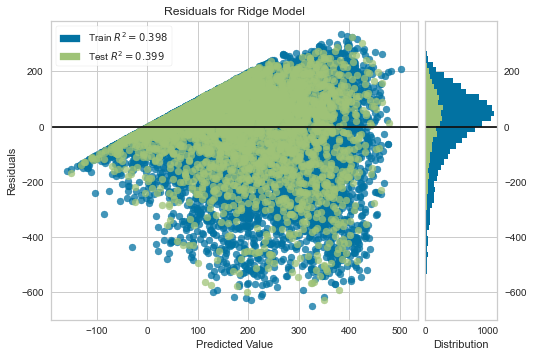

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test) 
visualizer.show()

Text(0, 0.5, 'Predicted values for y')

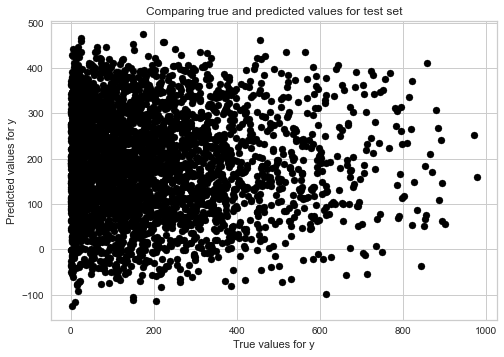

In [110]:
y_pred_test = regressor.predict(x_test)
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

**9. Calculate R2 score for the model applied on X_train and y_train**

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 137.9983
R-squared = 0.3986


**10. Store/save the model using fit() function**

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ResidualsPlot(ax=<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>,
              line_color=None, model=None, test_alpha=None, test_color=None,
              train_alpha=None, train_color=None)

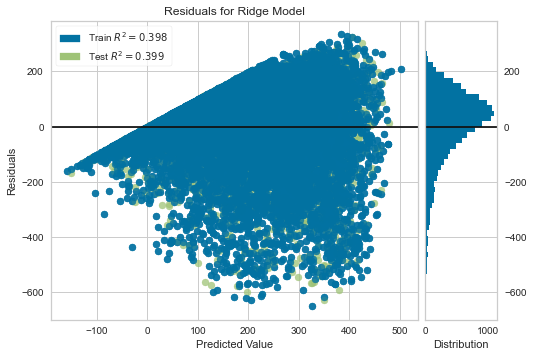

In [116]:
visualizer.fit(X_train, y_train)

**11. Apply the model on the test data
Hint: use predict() function**

In [118]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([439.97477012, 193.80586822,  62.35968801, ...,  51.06323225,
       199.39556974, 214.82875881])

**12. Apply the saved model on the test data and calculate R2**

In [123]:
print('R-2 score= %.4f' % r2_score(y_test, y_pred_test))

R-2 score= 0.3986


**13. Finally, give your conclusion whether Linear Regression is preferred for the current dataset or not.**

*Linear Regression should not be preferred**